This notebook should be launched from a session of jupyter notebook that was launched from a DB2 command window
To do this, run an administrator DB2 command window as an administrator and type 'jupyter notebook'

Set up the enviornment:

In [1]:
import sys,os,os.path
os.environ['IBM_DB_HOME']='C:\Program Files\IBM\SQLLIB'
!pip install msgpack
!pip install ipython-sql
!pip install ibm_db 
!pip install ibm_db_sa

Restart the Kernel if this is your first time installing the above. The next steps will fail unless you do this.

Import the modules and load the SQL magic

In [2]:
import ibm_db
import ibm_db_sa
import sqlalchemy
%load_ext sql
from IPython.display import HTML
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime as dt
import numpy as np
import pandas as pd
from functools import reduce

# All plots should be inline, inside the notebook
#%matplotlib inline

In [3]:
## Hide code cells
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

Connect to the database. Change the values of user, host, and password to match your environment. For connection to a local host, use 'localhost' for the host name. Also change the port number and database name in the connection string.

In [4]:
user='db2admin'
host='localhost'
# Define filename for passwords
filename = 'ember_variables.py'
# source the file
%run $filename
password = LocalDB2password
port=50000
db='DB2_PERF'
%sql db2+ibm_db://$user:$password@$host:$port/$db

'Connected: db2admin@DB2_PERF'

In [5]:
#Restarts
%sql select baseline_timestamp \
from vdba.VW_DB_PERF \
where duration_min < 58

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.


baseline_timestamp
2018-05-07 23:35:01
2018-05-08 02:46:37


# Db2 Database Performance Trends for the last month


## Index Read Efficiency

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.


<function matplotlib.pyplot.show(*args, **kw)>

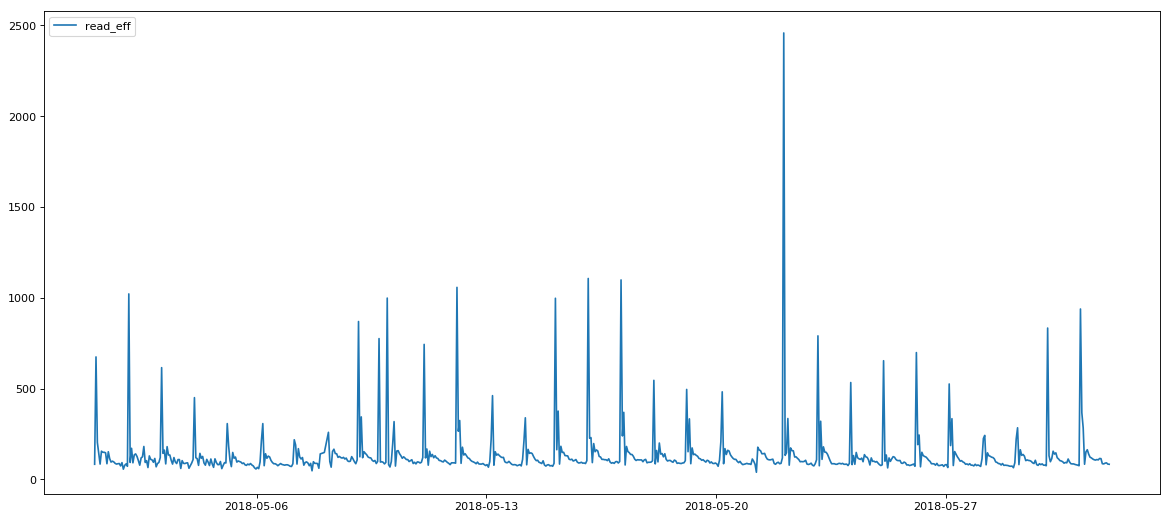

In [6]:
read_eff=%sql select timestamp, decimal(float(rows_read)/float(rows_returned),10,0) read_eff \
from vdba.VW_DB_PERF \
where duration_min between 58 and 61

df=read_eff.DataFrame()

plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(df.TIMESTAMP, df.read_eff)
plt.legend(loc='upper left')
plt.show

### Read Efficiency by Time of Day

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.


<function matplotlib.pyplot.show(*args, **kw)>

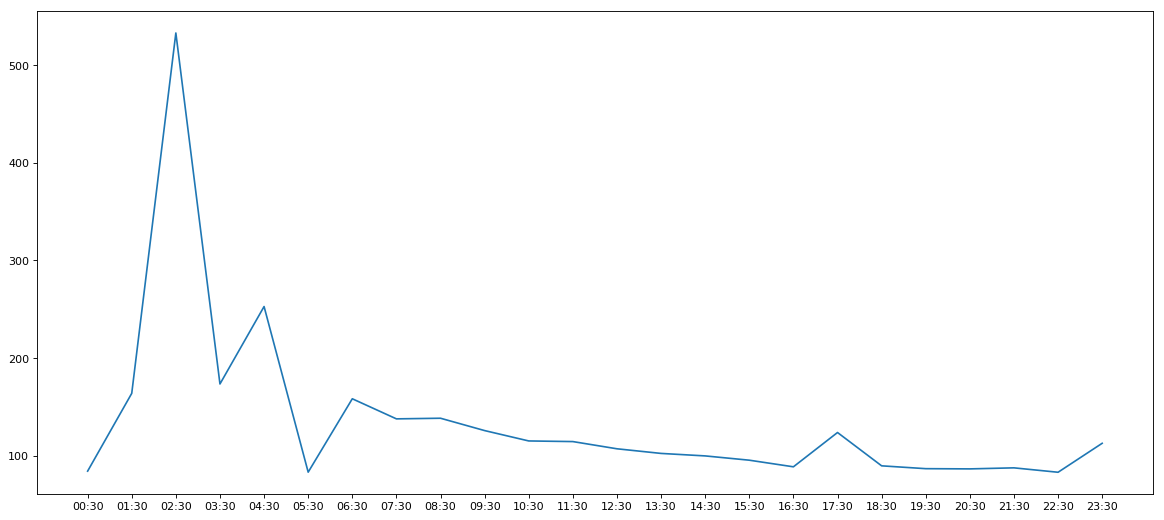

In [7]:
# Avg Read eff by time of day
read_eff=%sql select to_char(timestamp,'HH24:MI') as time, avg(decimal(float(rows_read)/float(rows_returned),10,0)) avg_read_eff \
from vdba.VW_DB_PERF \
where duration_min between 58 and 61 \
group by to_char(timestamp,'HH24:MI') \

df=read_eff.DataFrame()

plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(df.TIME, df.avg_read_eff)
plt.show

### Times with Bad Read Efficiency

In [8]:
#Times index read efficiency out of range
%sql with t1 as (select avg(decimal(float(rows_read)/float(rows_returned),10,0)) as average \
, stddev(decimal(float(rows_read)/float(rows_returned),10,0)) as stdev \
from vdba.VW_DB_PERF \
where duration_min between 58 and 61) \
select timestamp, decimal(float(rows_read)/float(rows_returned),10,0) read_eff \
from vdba.VW_DB_PERF, t1 \
where (float(rows_read)/float(rows_returned)) > (t1.average + (2*t1.stdev)) \
and duration_min between 58 and 61 \
order by timestamp

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.


TIMESTAMP,read_eff
2018-05-01 02:30:01,674
2018-05-02 02:30:01,1021
2018-05-03 02:30:01,615
2018-05-04 02:30:02,450
2018-05-09 02:30:02,869
2018-05-09 17:30:02,775
2018-05-09 23:30:01,998
2018-05-11 02:30:02,743
2018-05-12 02:30:02,1057
2018-05-13 04:30:02,461


## Buffer Pool Hit Ratios

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.
 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.
 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.


<function matplotlib.pyplot.show(*args, **kw)>

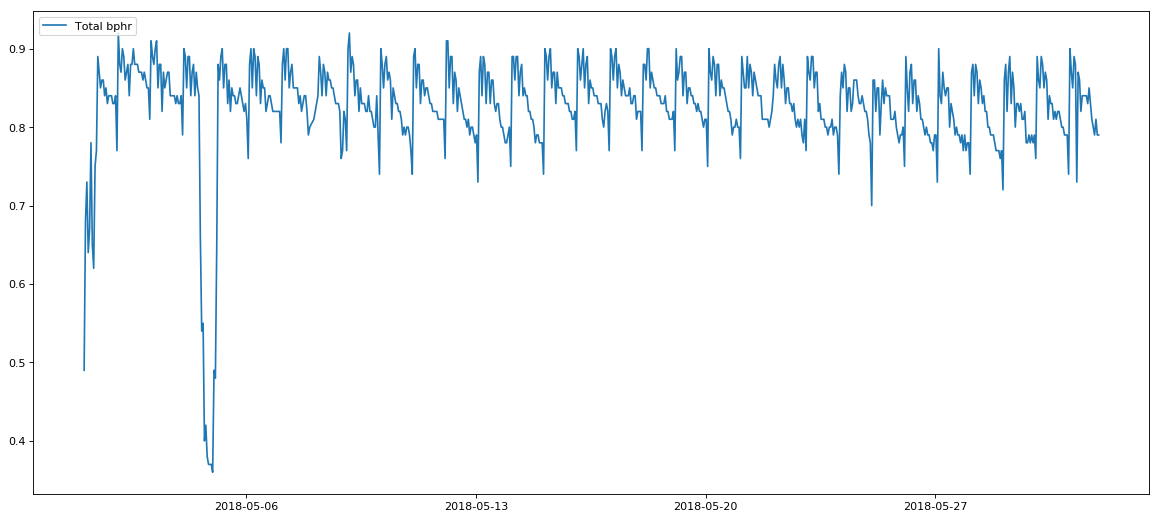

In [9]:
bphr=%sql select timestamp, decimal(((float(pool_data_lbp_pages_found) + float(pool_index_lbp_pages_found) \
+ float(pool_xda_lbp_pages_found) + float(pool_col_lbp_pages_found) \
- float(pool_async_data_lbp_pages_found) - float(pool_async_index_lbp_pages_found) - float(pool_async_xda_lbp_pages_found) - float(pool_async_col_lbp_pages_found))  \
/ (float(pool_data_l_reads) + float(pool_index_l_reads) + float(pool_xda_l_reads) + float(pool_col_l_reads) + float(pool_temp_data_l_reads) + float(pool_temp_xda_l_reads) + float(pool_temp_index_l_reads) + float(pool_temp_col_l_reads))),5,2) as bphr \
from vdba.VW_DB_PERF \
where duration_min between 58 and 61

data_bphr=%sql select timestamp, 1-decimal((float(pool_data_lbp_pages_found) \
- float(pool_async_data_lbp_pages_found)) \
/ (float(pool_data_l_reads) + float(pool_temp_data_l_reads) ),5,2) as data_bphr \
from vdba.VW_DB_PERF \
where duration_min between 58 and 61

index_bphr=%sql select timestamp \
, case \
when pool_index_lbp_pages_found - pool_async_index_lbp_pages_found <> 0 \
then decimal((float(pool_index_lbp_pages_found) - float(pool_async_index_lbp_pages_found)) / (float(pool_index_l_reads) + float(pool_temp_index_l_reads)),5,2) \
else 1 - decimal((float(pool_index_p_reads) + float(pool_temp_index_p_reads)) / (float(pool_index_l_reads) + float(pool_temp_index_l_reads)),5,2) end as index_bphr \
from vdba.VW_DB_PERF \
where duration_min between 58 and 61

#temp_bphr=%sql select timestamp, case when (float(POOL_TEMP_DATA_L_READS)+float(POOL_TEMP_INDEX_L_READS)+float(POOL_TEMP_XDA_L_READS) > 0 ) \
#then 1-decimal(((float(POOL_TEMP_DATA_P_READS)+float(POOL_TEMP_INDEX_P_READS)+float(POOL_TEMP_XDA_P_READS)) \
#/(float(POOL_TEMP_DATA_L_READS)+float(POOL_TEMP_INDEX_L_READS)+float(POOL_TEMP_XDA_L_READS))),10,2) else 1 end as temp_bphr \
#from vdba.VW_DB_PERF \
#where duration_min between 58 and 61

#xda_bphr=%sql select timestamp, decimal((float(pool_xda_lbp_pages_found) \
#- float(pool_async_xda_lbp_pages_found)) \
#/ (float(pool_xda_l_reads) + float(pool_temp_xda_l_reads) ),5,2) as xda_bphr \
#from vdba.VW_DB_PERF \
#where duration_min between 58 and 61

df=bphr.DataFrame()
#df2=data_bphr.DataFrame()
#df3=index_bphr.DataFrame()
#df4=temp_bphr.DataFrame()
#df5=xda_bphr.DataFrame()


plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(df.TIMESTAMP, df.bphr, label='Total bphr')
#plt.plot(df2.TIMESTAMP, df2.data_bphr, label='Data bphr')
#plt.plot(df3.TIMESTAMP, df3.index_bphr, label='Index bphr')
#plt.plot(df4.TIMESTAMP, df4.temp_bphr, label='Temp bphr')
#plt.plot(df5.TIMESTAMP, df5.temp_bphr, label='XDA bphr')
plt.legend(loc='upper left')
plt.show


### Buffer Pool Hit Ratio by Time of Day

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.


<function matplotlib.pyplot.show(*args, **kw)>

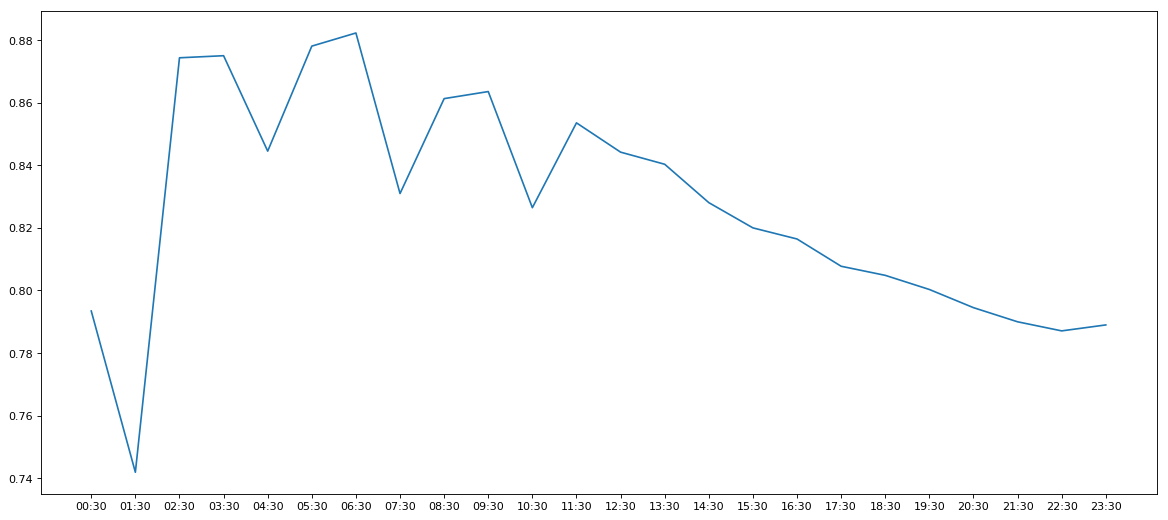

In [10]:
# Average BPHR by time of day
bphr=%sql select to_char(timestamp,'HH24:MI') as time, avg(decimal(((float(pool_data_lbp_pages_found) + float(pool_index_lbp_pages_found) \
+ float(pool_xda_lbp_pages_found) + float(pool_col_lbp_pages_found) \
- float(pool_async_data_lbp_pages_found) - float(pool_async_index_lbp_pages_found) - float(pool_async_xda_lbp_pages_found) - float(pool_async_col_lbp_pages_found))  \
/ (float(pool_data_l_reads) + float(pool_index_l_reads) + float(pool_xda_l_reads) + float(pool_col_l_reads) + float(pool_temp_data_l_reads) + float(pool_temp_xda_l_reads) + float(pool_temp_index_l_reads) + float(pool_temp_col_l_reads))),5,2)) as avg_bphr \
from vdba.VW_DB_PERF \
where duration_min between 58 and 61 \
group by to_char(timestamp,'HH24:MI')

df=bphr.DataFrame()

plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(df.TIME, df.avg_bphr)
plt.show

### Times Buffer Pool Hit Ratio was bad

In [11]:
# Times BPHR out of range
bad_bphr=%sql with t2 as (select timestamp, decimal(((float(pool_data_lbp_pages_found) + float(pool_index_lbp_pages_found) \
+ float(pool_xda_lbp_pages_found) + float(pool_col_lbp_pages_found) \
- float(pool_async_data_lbp_pages_found) - float(pool_async_index_lbp_pages_found) - float(pool_async_xda_lbp_pages_found) - float(pool_async_col_lbp_pages_found))  \
/ (float(pool_data_l_reads) + float(pool_index_l_reads) + float(pool_xda_l_reads) + float(pool_col_l_reads) + float(pool_temp_data_l_reads) + float(pool_temp_xda_l_reads) + float(pool_temp_index_l_reads) + float(pool_temp_col_l_reads))),5,2) as bphr \
from vdba.VW_DB_PERF), \
t1 as (select avg(bphr) as average, stddev(bphr) as stdev from t2) \
select t2.timestamp, bphr \
from t2 join vdba.VW_DB_PERF vw on t2.timestamp=vw.timestamp, t1 \
where t2.bphr < (t1.average - (2*t1.stdev)) \
and duration_min between 58 and 61 \
order by timestamp

print(bad_bphr)

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.
+---------------------+------+
|      TIMESTAMP      | bphr |
+---------------------+------+
| 2018-05-01 01:30:01 | 0.49 |
| 2018-05-01 02:30:01 | 0.68 |
| 2018-05-01 04:30:01 | 0.64 |
| 2018-05-01 05:30:02 | 0.67 |
| 2018-05-01 07:30:02 | 0.65 |
| 2018-05-01 08:30:01 | 0.62 |
| 2018-05-04 14:30:02 | 0.66 |
| 2018-05-04 15:30:02 | 0.54 |
| 2018-05-04 16:30:01 | 0.55 |
| 2018-05-04 17:30:02 | 0.40 |
| 2018-05-04 18:30:02 | 0.42 |
| 2018-05-04 19:30:02 | 0.38 |
| 2018-05-04 20:30:02 | 0.37 |
| 2018-05-04 21:30:02 | 0.37 |
| 2018-05-04 22:30:02 | 0.37 |
| 2018-05-04 23:30:02 | 0.36 |
| 2018-05-05 00:30:01 | 0.49 |
| 2018-05-05 01:30:02 | 0.48 |
| 2018-05-05 02:30:01 | 0.65 |
+---------------------+------+


## Package Cache

### Package Cache Hit Ratio

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.


<function matplotlib.pyplot.show(*args, **kw)>

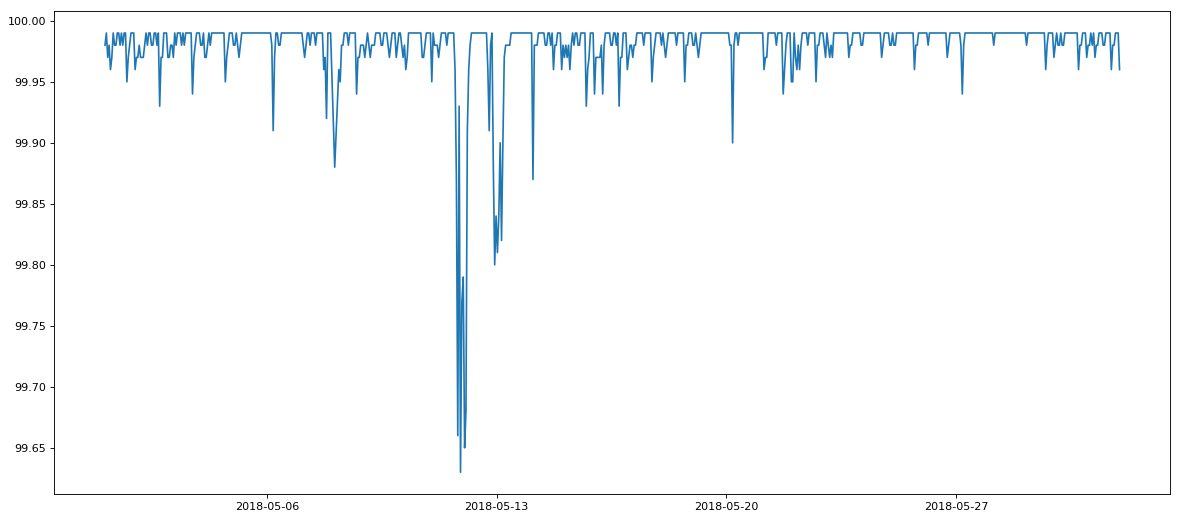

In [12]:
pkg_cache=%sql select timestamp, decimal((1-(float(pkg_cache_inserts)/float(pkg_cache_lookups)))*100,5,2) as pkg_cache_hitratio \
from vdba.VW_DB_PERF \
where duration_min between 58 and 61

df=pkg_cache.DataFrame()

plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(df.TIMESTAMP, df.pkg_cache_hitratio)
plt.show

### Bad Package Cache Hit Ratios

In [13]:
# Times pkg cache hit ratio out of range
%sql with t1 as (select avg(decimal((1-(float(pkg_cache_inserts)/float(pkg_cache_lookups)))*100,5,2)) as average \
, stddev(decimal((1-(float(pkg_cache_inserts)/float(pkg_cache_lookups)))*100,5,2)) as stdev \
from vdba.VW_DB_PERF \
where duration_min between 58 and 61) \
select timestamp, decimal((1-(float(pkg_cache_inserts)/float(pkg_cache_lookups)))*100,5,2) as pkg_cache_hitratio \
from vdba.VW_DB_PERF, t1 \
where decimal((1-(float(pkg_cache_inserts)/float(pkg_cache_lookups)))*100,5,2) < (t1.average - (2*t1.stdev)) \
and duration_min between 58 and 61

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.


TIMESTAMP,pkg_cache_hitratio
2018-05-06 04:30:02,99.91
2018-05-08 01:30:02,99.88
2018-05-11 18:30:02,99.87
2018-05-11 19:30:01,99.66
2018-05-11 21:30:02,99.63
2018-05-11 22:30:02,99.77
2018-05-11 23:30:02,99.79
2018-05-12 00:30:01,99.65
2018-05-12 01:30:02,99.68
2018-05-12 02:30:02,99.91


### Package Cache Overflows

In [14]:
%sql select timestamp, PKG_CACHE_NUM_OVERFLOWS \
from vdba.VW_DB_PERF \
where PKG_CACHE_NUM_OVERFLOWS > 0 \
and duration_min between 58 and 61

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.


TIMESTAMP,pkg_cache_num_overflows


## Catalog Cache

### Catalog Cache Hit Ratio

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.


<function matplotlib.pyplot.show(*args, **kw)>

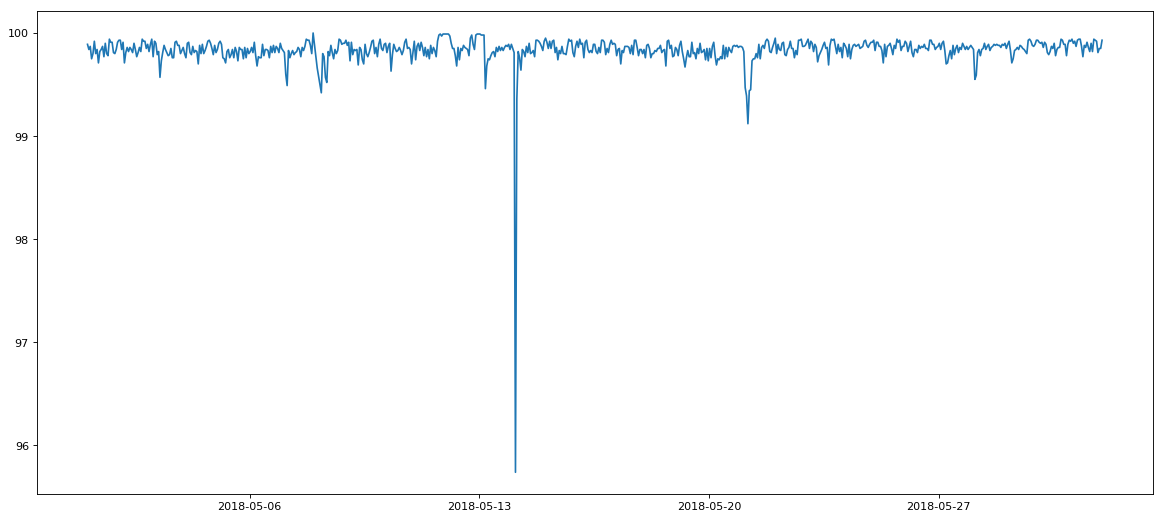

In [15]:
cat_cache=%sql select timestamp, decimal((1-(float(cat_cache_inserts)/float(cat_cache_lookups)))*100,5,2) as cat_cache_hitratio \
from vdba.VW_DB_PERF \
where duration_min between 58 and 61


df=cat_cache.DataFrame()

plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(df.TIMESTAMP, df.cat_cache_hitratio)
plt.show

### Bad Catalog Cache Hit Ratios

In [16]:
# Times cat cache hit ratio out of range
%sql with t1 as (select avg(decimal((1-(float(cat_cache_inserts)/float(cat_cache_lookups)))*100,5,2)) as average \
, stddev(decimal((1-(float(cat_cache_inserts)/float(cat_cache_lookups)))*100,5,2)) as stdev \
from vdba.VW_DB_PERF \
where duration_min between 58 and 61) \
select timestamp, decimal((1-(float(cat_cache_inserts)/float(cat_cache_lookups)))*100,5,2) as cat_cache_hitratio \
from vdba.VW_DB_PERF, t1 \
where decimal((1-(float(cat_cache_inserts)/float(cat_cache_lookups)))*100,5,2) < (t1.average - (2 * t1.stdev)) \
and duration_min between 58 and 61

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.


TIMESTAMP,cat_cache_hitratio
2018-05-07 03:30:01,99.49
2018-05-08 04:30:02,99.42
2018-05-13 04:30:02,99.46
2018-05-14 02:30:02,95.74
2018-05-14 03:30:02,99.36
2018-05-21 02:30:02,99.47
2018-05-21 03:30:02,99.39
2018-05-21 04:30:02,99.12
2018-05-21 05:30:02,99.44
2018-05-21 06:30:02,99.45


### Catalog Cache Overflows

In [17]:
%sql select timestamp, cat_cache_overflows \
from vdba.VW_DB_PERF \
where cat_cache_overflows > 0 \
and duration_min between 58 and 61 \

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.


TIMESTAMP,cat_cache_overflows


## Locking

### Negative Locking Issues

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.


<function matplotlib.pyplot.show(*args, **kw)>

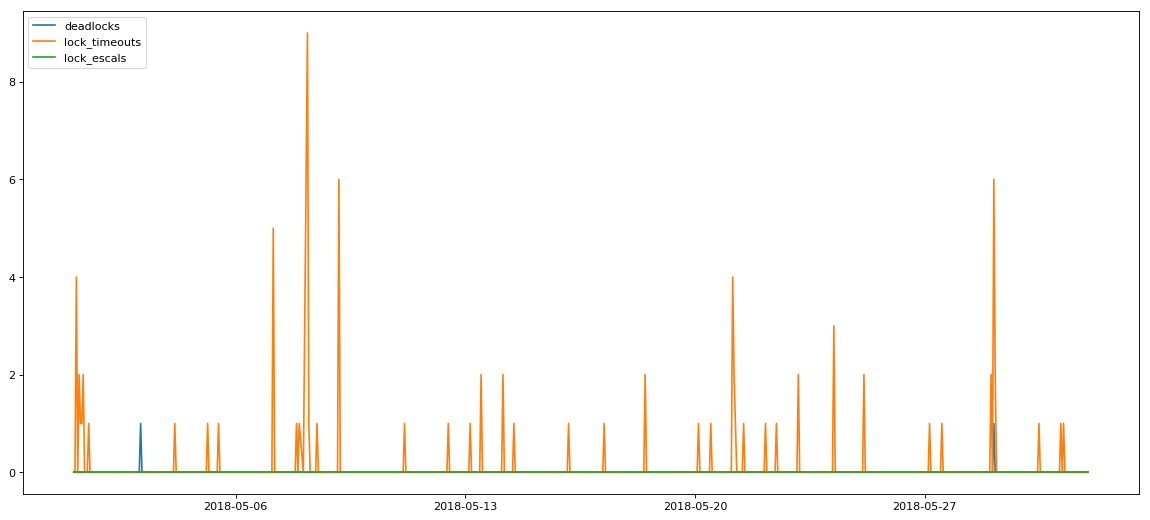

In [18]:
locking_info=%sql select timestamp \
    , deadlocks \
    , lock_timeouts \
    , lock_escals \
from vdba.VW_DB_PERF \
where duration_min between 58 and 61 \

df=locking_info.DataFrame()

plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(df.TIMESTAMP, df.deadlocks)
plt.plot(df.TIMESTAMP, df.lock_timeouts)
plt.plot(df.TIMESTAMP, df.lock_escals)
plt.legend(loc='upper left')
plt.show

### Negative Locking issues by time of day

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.


<function matplotlib.pyplot.show(*args, **kw)>

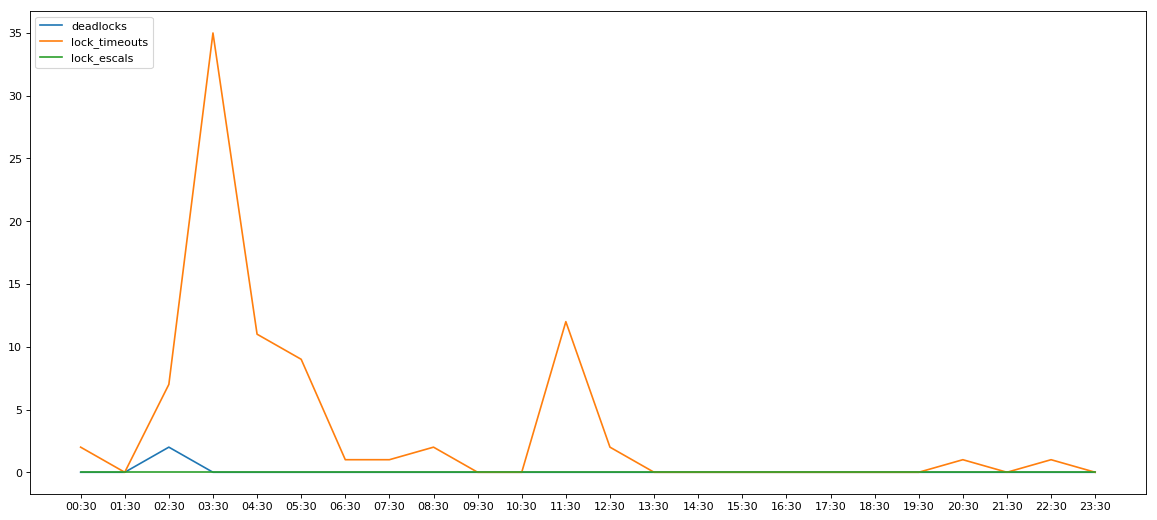

In [19]:
#Locking issues by time of day
locking_info=%sql select to_char(timestamp,'HH24:MI') as time \
    , sum(deadlocks) as deadlocks \
    , sum(lock_timeouts) as lock_timeouts \
    , sum(lock_escals) as lock_escals \
from vdba.VW_DB_PERF \
where duration_min between 58 and 61 \
group by to_char(timestamp,'HH24:MI') \

df=locking_info.DataFrame()

plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(df.TIME, df.deadlocks)
plt.plot(df.TIME, df.lock_timeouts)
plt.plot(df.TIME, df.lock_escals)
plt.legend(loc='upper left')
plt.show

### List of Negative Locking Events

In [20]:
%sql select timestamp \
    , deadlocks \
    , lock_timeouts \
    , lock_escals \
from vdba.VW_DB_PERF \
where ( deadlocks > 0 OR lock_timeouts > 0 OR lock_escals > 0 ) \
and duration_min between 58 and 61 \

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.


TIMESTAMP,deadlocks,lock_timeouts,lock_escals
2018-05-01 03:30:01,0,4,0
2018-05-01 05:30:02,0,2,0
2018-05-01 06:30:02,0,1,0
2018-05-01 07:30:02,0,1,0
2018-05-01 08:30:01,0,2,0
2018-05-01 12:30:02,0,1,0
2018-05-03 02:30:01,1,0,0
2018-05-04 03:30:02,0,1,0
2018-05-05 03:30:02,0,1,0
2018-05-05 11:30:01,0,1,0


## Sorts

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.


<function matplotlib.pyplot.show(*args, **kw)>

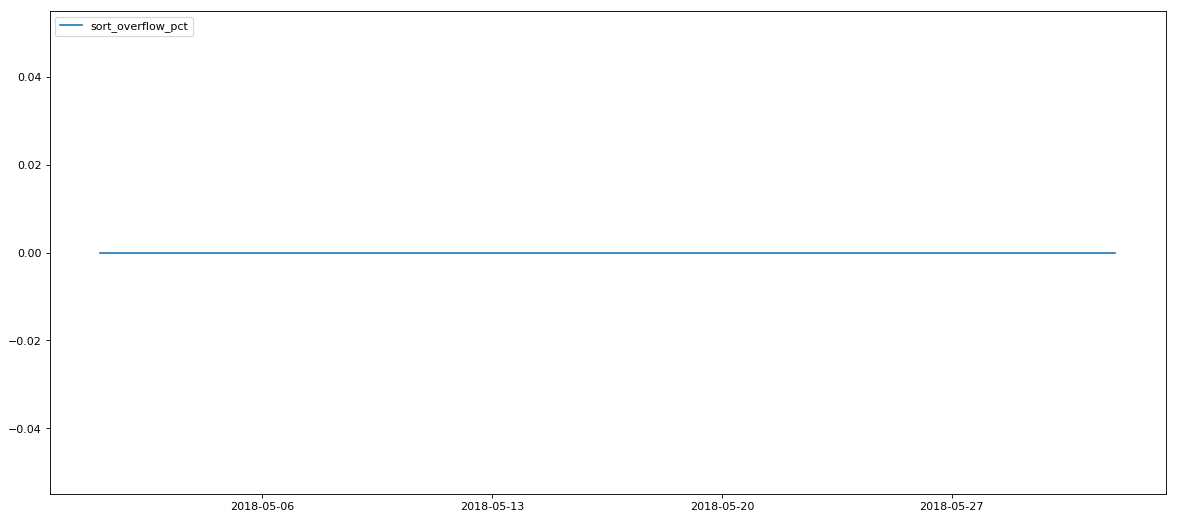

In [21]:
sort_overflw=%sql select timestamp, sort_overflows, total_sorts, decimal(float(sort_overflows)/float(total_sorts),5,2) as sort_overflow_pct \
from vdba.VW_DB_PERF \
where duration_min between 58 and 61 

df=sort_overflw.DataFrame()

plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(df.TIMESTAMP, df.sort_overflow_pct)
plt.legend(loc='upper left')
plt.show

## Overall Activity

 * db2+ibm_db://db2admin:***@localhost:50000/DB2_PERF
Done.


<function matplotlib.pyplot.show(*args, **kw)>

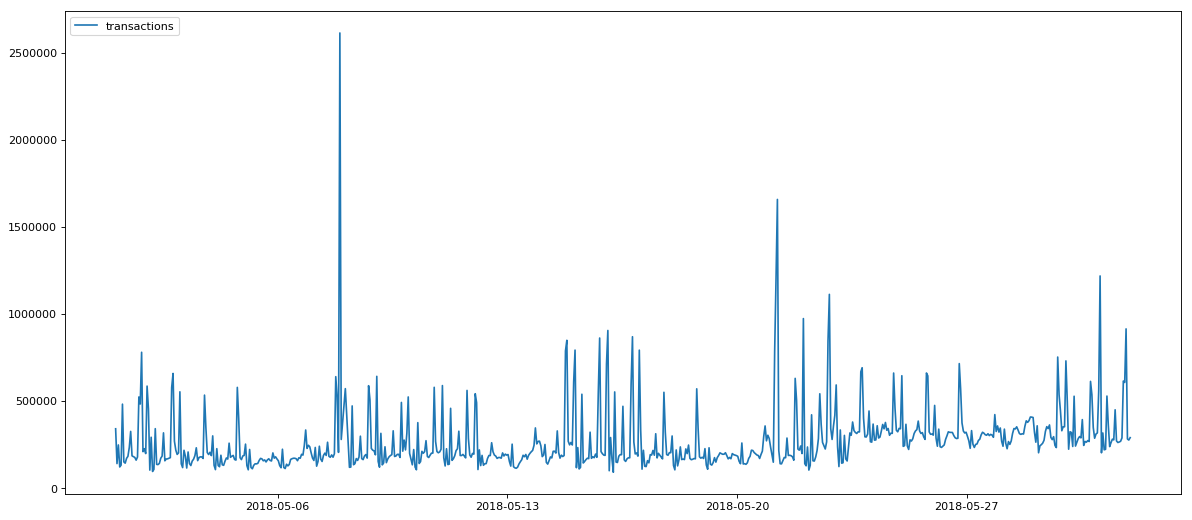

In [22]:
#Transactions
activity_info=%sql select timestamp \
    , TOTAL_APP_COMMITS + TOTAL_APP_ROLLBACKS as transactions \
from vdba.VW_DB_PERF \
where duration_min between 58 and 61 \

df=activity_info.DataFrame()

plt.figure(figsize=(18, 8), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(df.TIMESTAMP, df.transactions)
plt.legend(loc='upper left')
plt.show